### Github Link:

#### https://github.com/QwertyMD/clz-ai

### Run First: Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem - 1: Getting Started with Data Exploration:


#### 1. Data Exploration and Understanding:


##### Dataset Overview:


1. Load the dataset and display the first 10 rows.


In [2]:
df = pd.read_csv("WorldHapinessReport.csv")
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.


In [3]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 143
Columns: 9


3. List all the columns and their data types.


In [4]:
df.dtypes

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

##### Basic Statistics:


1. Calculate the mean, median, and standard deviation for the Score column.


In [5]:
score_col = df.score
print(f"Mean: {score_col.mean()}")
print(f"Median: {score_col.median()}")
print(f"Standard Deviation: {score_col.std()}")

Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442993


2. Identify the country with the highest and lowest happiness scores.


In [6]:
print(f"Max: {score_col.max()} - {df.loc[score_col.idxmax(), 'Country name']}")
print(f"Min: {score_col.min()} - {df.loc[score_col.idxmin(), 'Country name']}")

Max: 7.741 - Finland
Min: 1.721 - Afghanistan


##### Missing Values:


1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [7]:
df.isnull().sum()

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

##### Filtering and Sorting:


1. Filter the dataset to show only the countries with a Score greater than 7.5.


In [8]:
df_filter = df[df.score > 7.5]
df_filter

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.


In [9]:
df_filter.nlargest(10, "Log GDP per capita")

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


##### Adding New Columns:


1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

   Low − (Score < 4)

   Medium − (4 ≤ Score ≤ 6)

   High − (Score > 6)


In [10]:
df_new = df.copy()

def categorize(score):
    if score <= 4:
        return "Low"
    elif score <= 6:
        return "Medium"
    else:
        return "High"

df_new["Happiness Category"] = df_new.score.apply(categorize)

df_new[["Country name", "score", "Happiness Category"]]

,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


#### 2. Data Visualizations:


##### Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


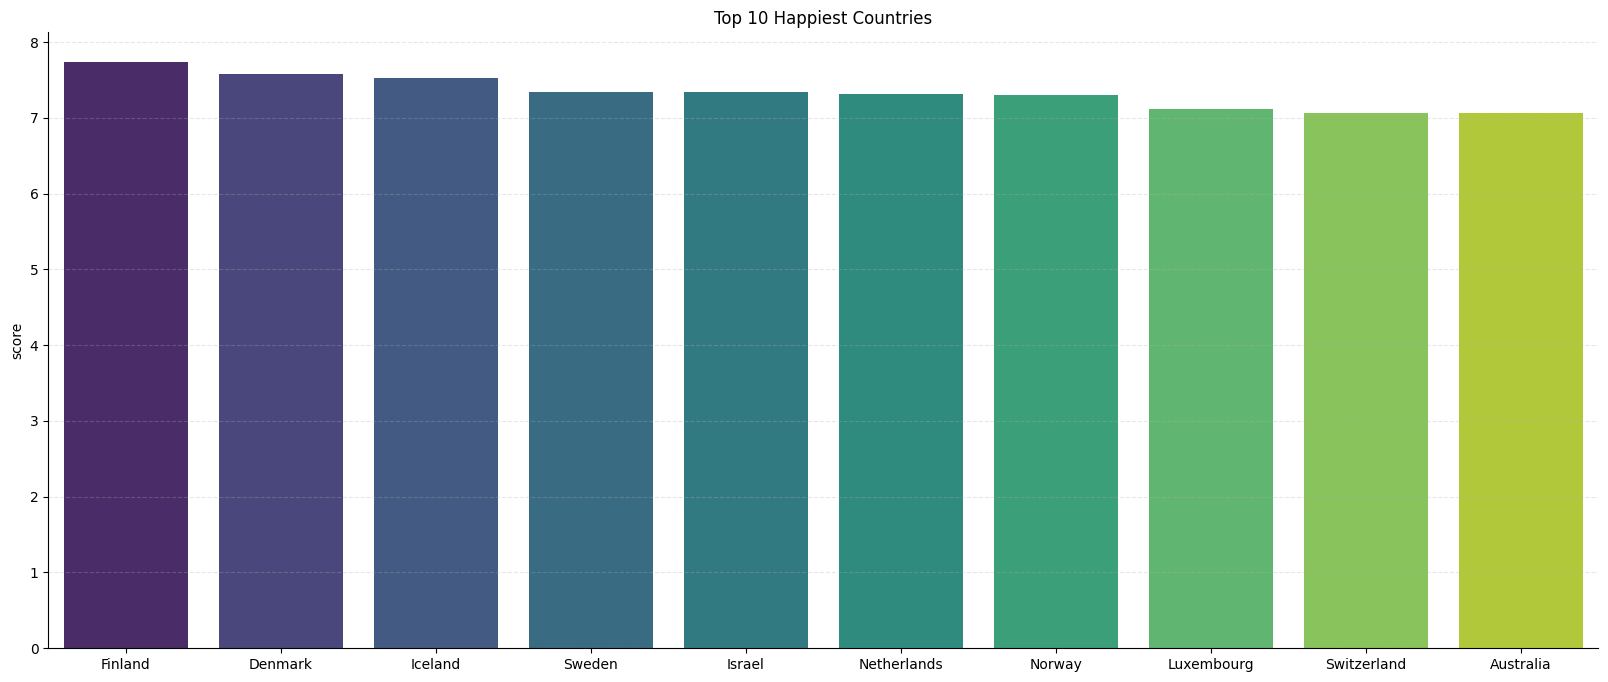

In [11]:
top_10_happy = df.nlargest(10, "score")
plt.figure(figsize=(20, 8))
sns.barplot(
    data=top_10_happy,
    x="Country name",
    y="score",
    hue="Country name",
    palette="viridis",
).set_title("Top 10 Happiest Countries")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.show()

##### Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.


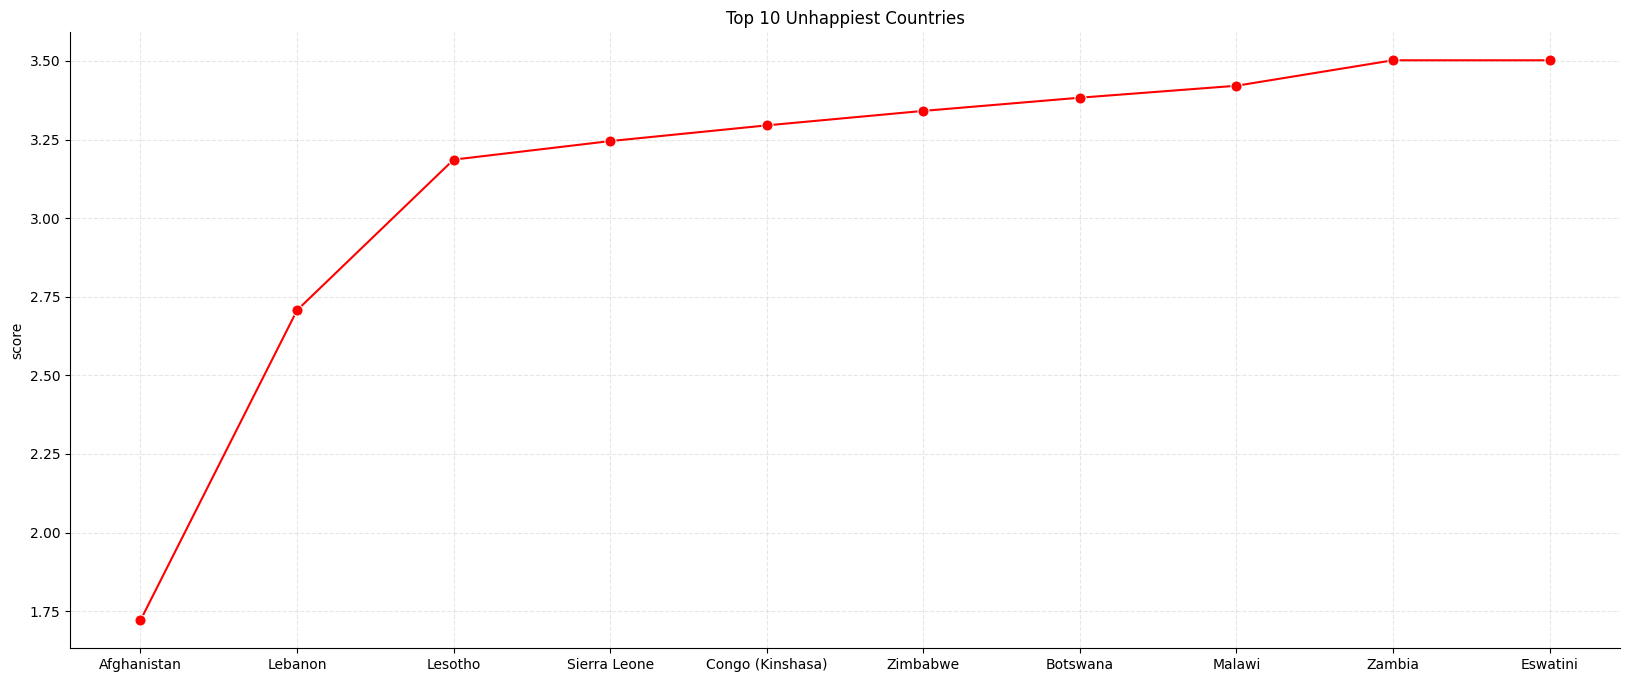

In [12]:
top_10_unhappy = df.nsmallest(10, "score")
plt.figure(figsize=(20, 8))
sns.lineplot(
    data=top_10_unhappy,
    x="Country name",
    y="score",
    marker="o",
    color="red",
    markersize=8,
).set_title("Top 10 Unhappiest Countries")
plt.xlabel("")
plt.grid(linestyle="--", alpha=0.3)
sns.despine()
plt.show()

##### Plot a histogram for the Score column to show its distribution and also interpret.


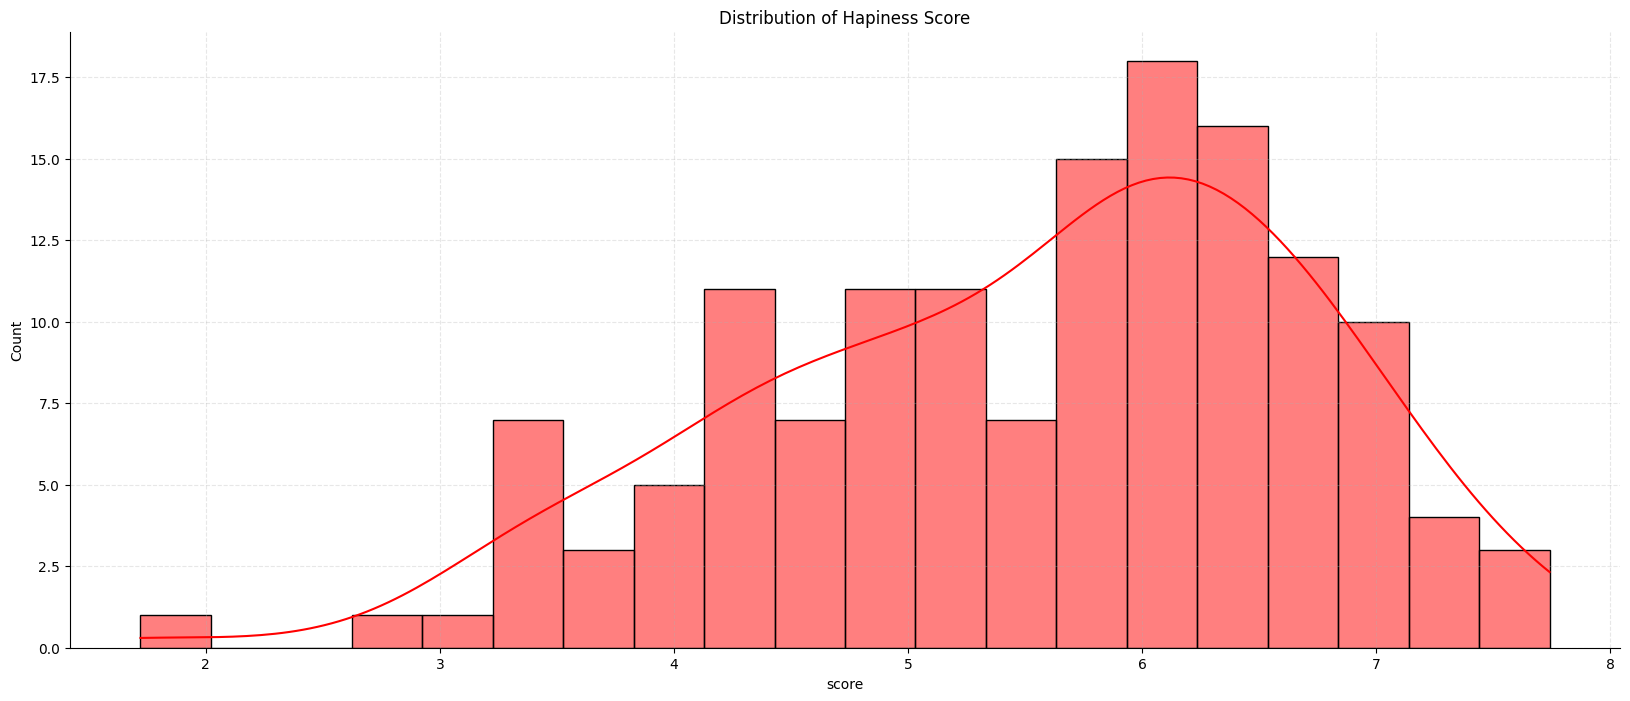

In [13]:
plt.figure(figsize=(20, 8))
sns.histplot(data=score_col, bins=20, kde=True, color="red").set_title(
    "Distribution of Hapiness Score"
)
plt.grid(linestyle="--", alpha=0.3)
sns.despine()
plt.show()

# The histogram indicates that happiness scores are peak around 6-6.5. Most countries fall between 4 and 7 with fewer at the extremes.

##### Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.


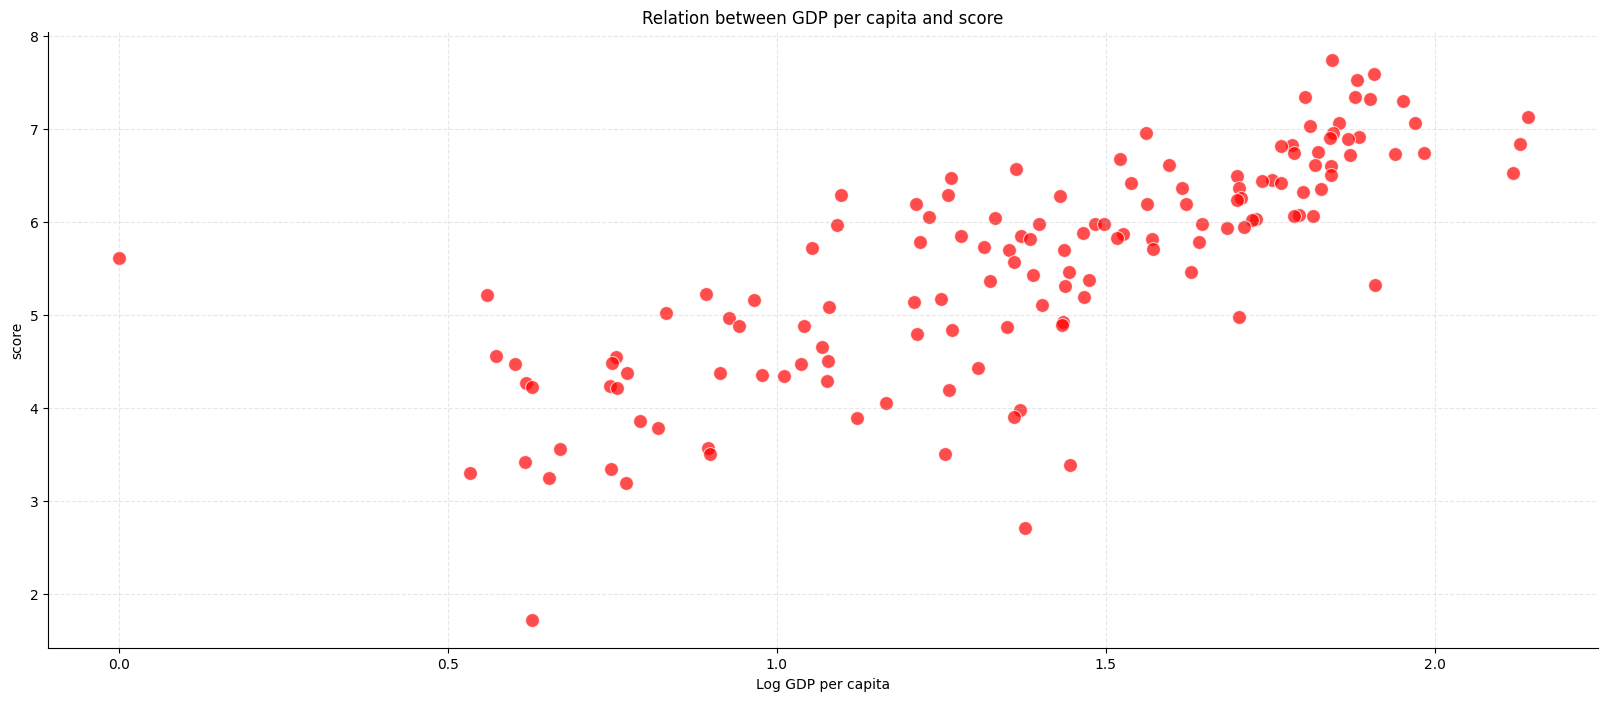

In [14]:
plt.figure(figsize=(20, 8))
sns.scatterplot(
    data=df, x="Log GDP per capita", y="score", color="red", alpha=0.7, s=100
).set_title("Relation between GDP per capita and score")
plt.grid(linestyle="--", alpha=0.3)
sns.despine()
plt.show()

### Problem - 2 - Some Advance Data Exploration Task:


#### Task - 1 - Setup Task - Preparing the South-Asia Dataset:


##### 1. Define the countries in South Asia with a list for example:

    south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]


In [15]:
south_asian_countries = [
    "Afghanistan",
    "Bangladesh",
    "Bhutan",
    "India",
    "Maldives",
    "Nepal",
    "Pakistan",
    "Sri Lanka",
]

##### 2. Use the list from step - 1 to filter the dataset {i.e. filtered out matching dataset from list.}


In [16]:
df_sac = df[df["Country name"].isin(south_asian_countries)]
df_sac

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


##### 3. Save the filtered dataframe as separate CSV files for future use.


In [17]:
df_sac.to_csv("SouthAsia.csv", index=False)

#### Task - 2 - Composite Score Ranking:


##### 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy


In [18]:
df_sac = pd.read_csv("SouthAsia.csv")
df_sac["Composite Score"] = (
    0.40 * df_sac["Log GDP per capita"]
    + 0.30 * df_sac["Social support"]
    + 0.30 * df_sac["Healthy life expectancy"]
)
df_sac

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


##### 2. Rank the South Asian countries based on the Composite Score in descending order.


In [19]:
df_sac[['Country name', 'Composite Score']].nlargest(len(df_sac), "Composite Score")

,Country name,Composite Score
3,Sri Lanka,1.0739
0,Nepal,0.8159
2,India,0.7874
1,Pakistan,0.7039
4,Bangladesh,0.6774
5,Afghanistan,0.3238


##### 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.


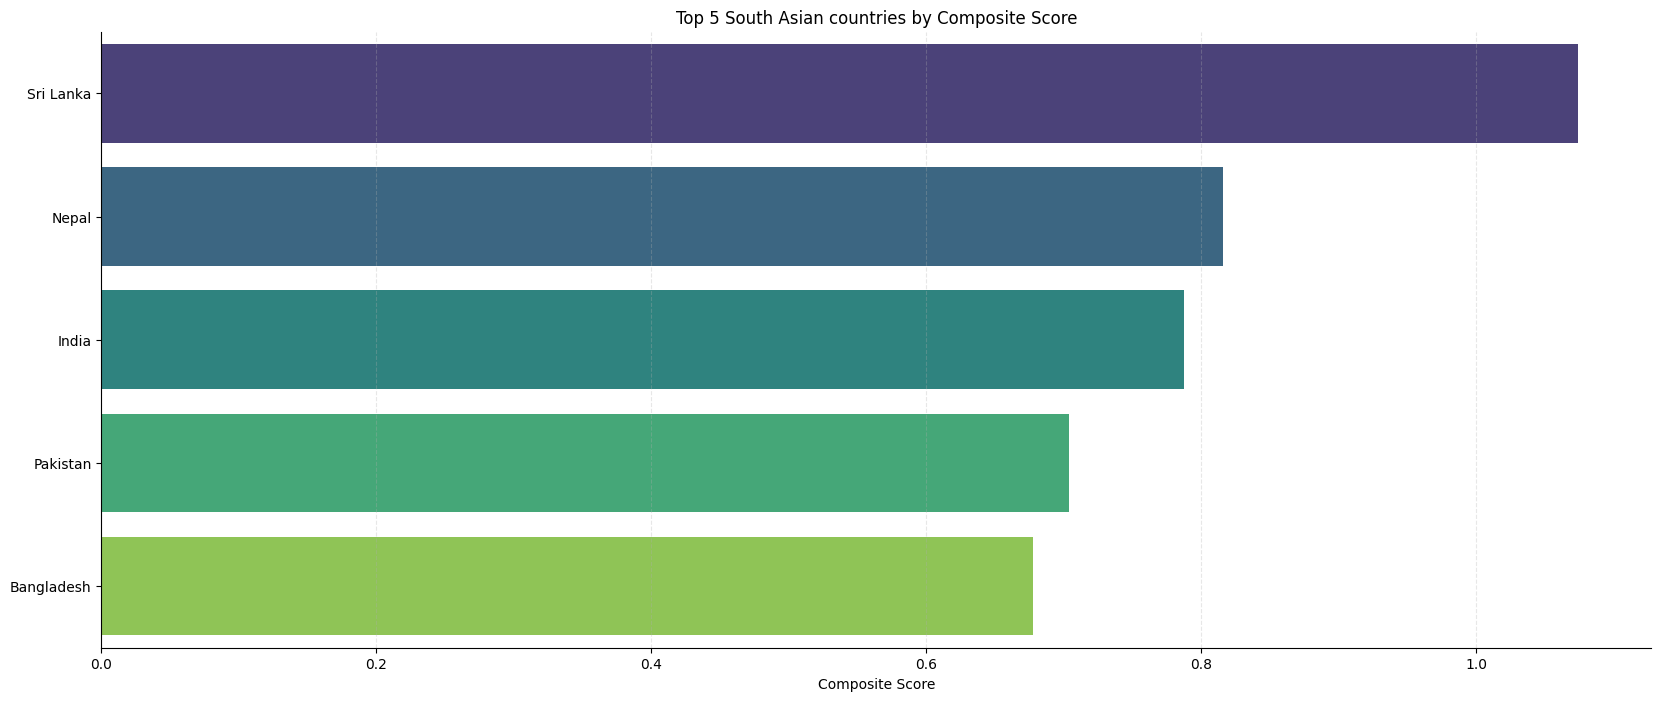

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


In [20]:
top_5_cs = df_sac.nlargest(5, "Composite Score")
plt.figure(figsize=(20, 8))
sns.barplot(
    data=top_5_cs,
    x="Composite Score",
    y="Country name",
    hue="Country name",
    palette="viridis",
).set_title("Top 5 South Asian countries by Composite Score")
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.3)
sns.despine()
plt.show()
df_sac

##### 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.


Rank by Original Score:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054
3    Sri Lanka  3.898
4   Bangladesh  3.886
5  Afghanistan  1.721

Rank by Composite Score:
  Country name  Composite Score
3    Sri Lanka           1.0739
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238


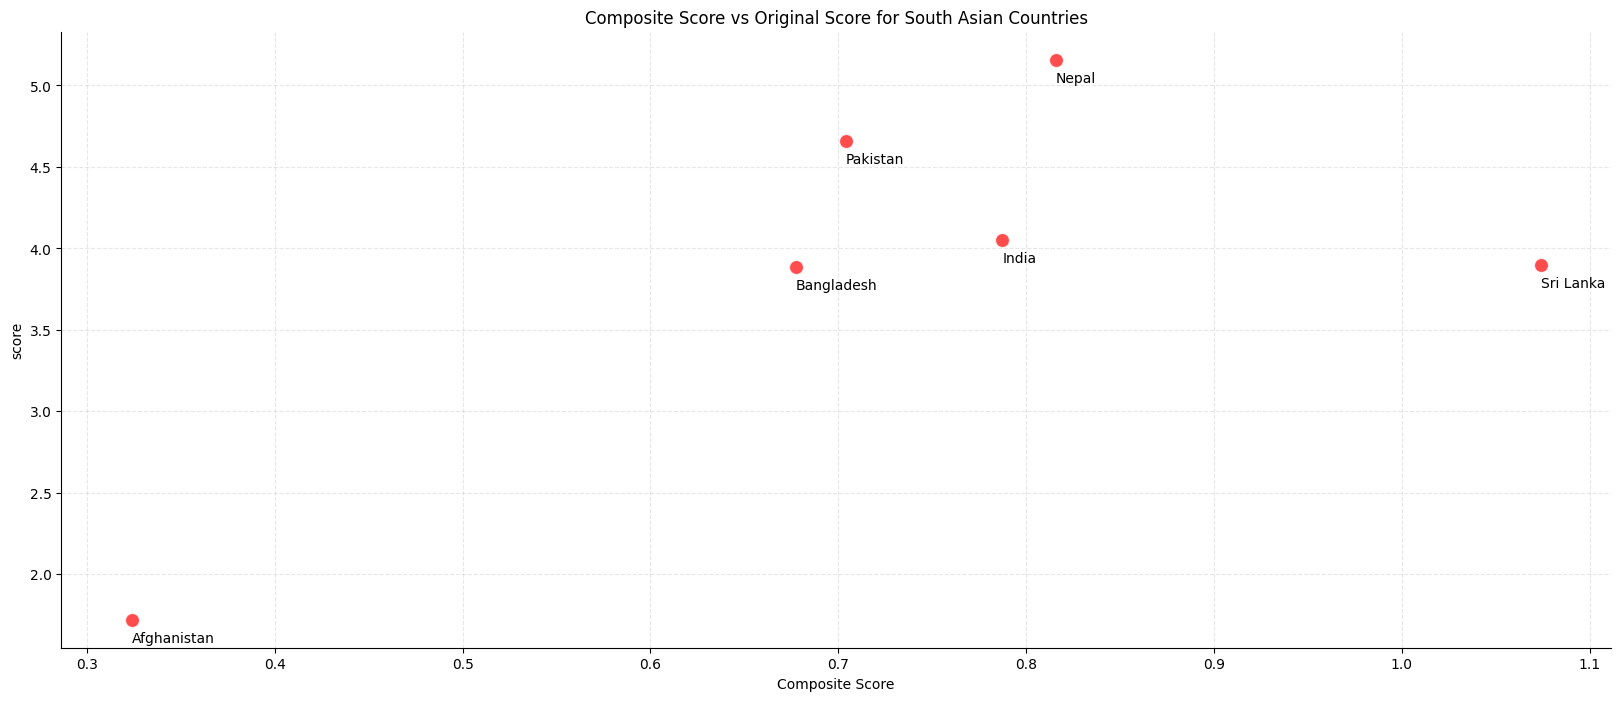

In [21]:
print("Rank by Original Score:")
print(df_sac[["Country name", "score"]].nlargest(len(df_sac), "score"))
print()
print("Rank by Composite Score:")
print(df_sac[["Country name", "Composite Score"]].nlargest(len(df_sac), "Composite Score"))

plt.figure(figsize=(20, 8))
sns.scatterplot(
    data=df_sac, x="Composite Score", y="score", color="red", alpha=0.7, s=100
).set_title("Composite Score vs Original Score for South Asian Countries")
plt.grid(linestyle="--", alpha=0.3)

for i in range(len(df_sac)):
    plt.text(
        df_sac.iloc[i]["Composite Score"],
        df_sac.iloc[i]["score"] - 0.07,
        df_sac.iloc[i]["Country name"],
        va="top"
    )

sns.despine()
plt.show()

# The rankings show some alignment, e.g. Afghanistan bottoms last and Bangladesh bottoms second-last in both. However, there are differences, like Sri Lanka ranking higher in comppsite score than original score. Also, India tops Pakistan in composite score whereas Pakistan tops India in original score.

#### Task - 3 - Outlier Detection:


##### 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.


In [22]:
def get_outliers(d):
    q1, q3 = np.quantile(d, [0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = d[(d < lower_bound) | (d > upper_bound)]
    return outliers


outliers_score = get_outliers(df_sac["score"])
outliers_gdp = get_outliers(df_sac["Log GDP per capita"])

print("Outlier Countries based on Score:")
print(df_sac.loc[outliers_score.index, ["Country name", "score"]])
print()
print("Outlier Countries based on GDP per Capita:")
print(df_sac.loc[outliers_gdp.index, ["Country name", "Log GDP per capita"]])

Outlier Countries based on Score:
  Country name  score
5  Afghanistan  1.721

Outlier Countries based on GDP per Capita:
  Country name  Log GDP per capita
5  Afghanistan               0.628


##### 2. Define outliers using the 1.5 × IQR rule.


An outlier is a data point that falls outside these calculated limits:

- Lower Limit = Q1 - 1.5 × IQR
- Upper Limit = Q3 + 1.5 × IQR

Any value below the lower limit or above the upper limit qualifies as an outlier.

##### 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.


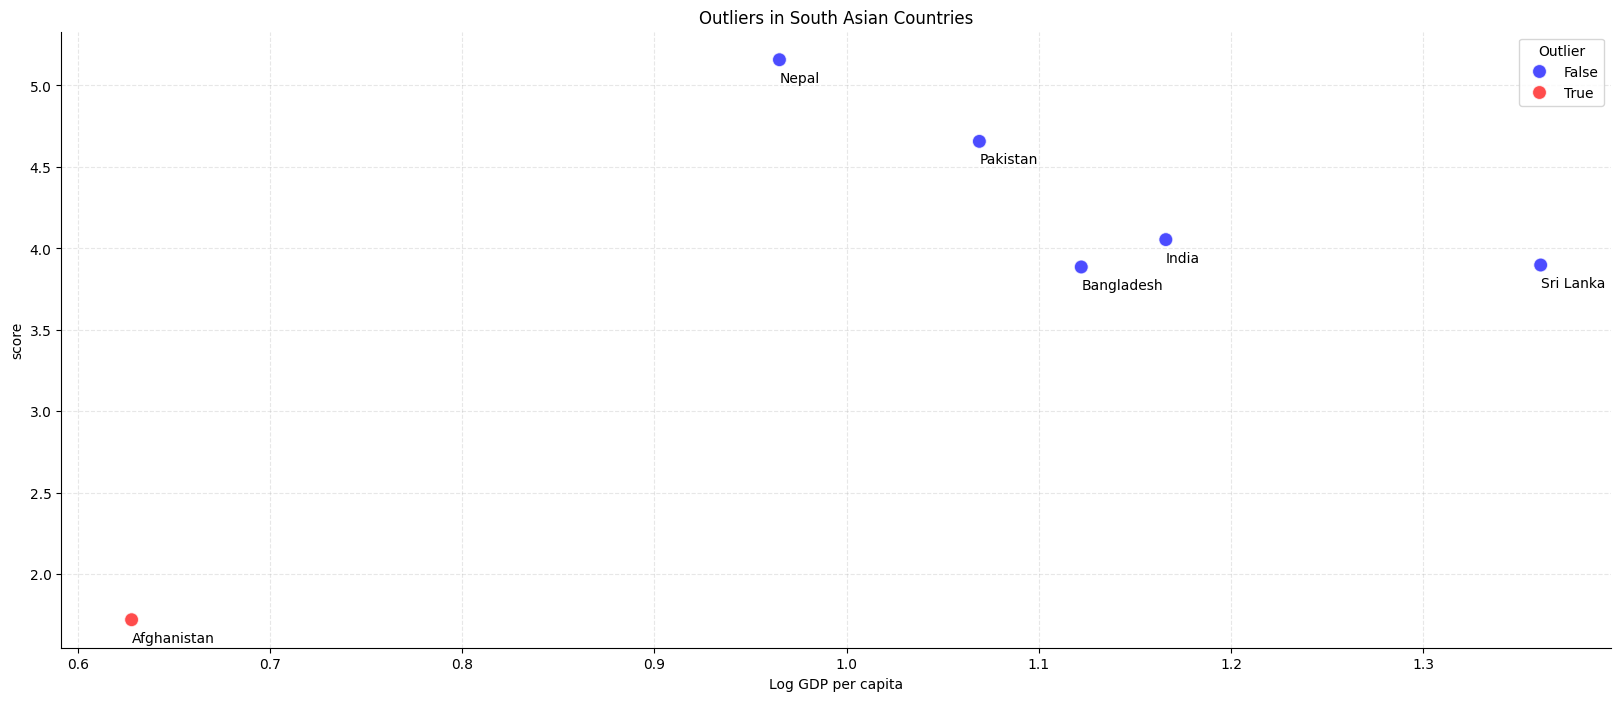

In [23]:
outlier_indices = outliers_score.index.union(outliers_gdp.index)
df_sac["Outlier"] = df_sac.index.isin(outlier_indices)

plt.figure(figsize=(20, 8))
sns.scatterplot(
    data=df_sac,
    x="Log GDP per capita",
    y="score",
    hue="Outlier",
    palette=["blue", "red"],
    alpha=0.7,
    s=100,
).set_title("Outliers in South Asian Countries")
plt.grid(linestyle="--", alpha=0.3)

for i in range(len(df_sac)):
    plt.text(
        df_sac.iloc[i]["Log GDP per capita"],
        df_sac.iloc[i]["score"] - 0.07,
        df_sac.iloc[i]["Country name"],
        va="top",
    )

sns.despine()
plt.show()

##### 4. Discuss the characteristics of these outliers and their potential impact on regional averages.


Afghanistan is the outlier with extremely low score and GDP per capita, reflecting severe socio-economic challenges. This outlier significantly lowers South Asia's regional averages for happiness scores and GDP per capita. For instance, including Afghanistan reduces the average score and GDP, making the region appear poorer and less happy than it would without this extreme value, which could influence comparative analyses with other regions.


#### Task - 4 - Exploring Trends Across Metrics:


##### 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.


In [24]:
free_corr = df_sac["Freedom to make life choices"].corr(df_sac["score"])
gen_corr = df_sac["Generosity"].corr(df_sac["score"])

print(f"Correlation - Freedom to Make Life Choices and Score: {free_corr}")
print(f"Correlation - Generosity and Score: {gen_corr}")

Correlation - Freedom to Make Life Choices and Score: 0.8005185224163315
Correlation - Generosity and Score: 0.874512371253192


##### 2. Create scatter plots with trendlines for these metrics against the Score.


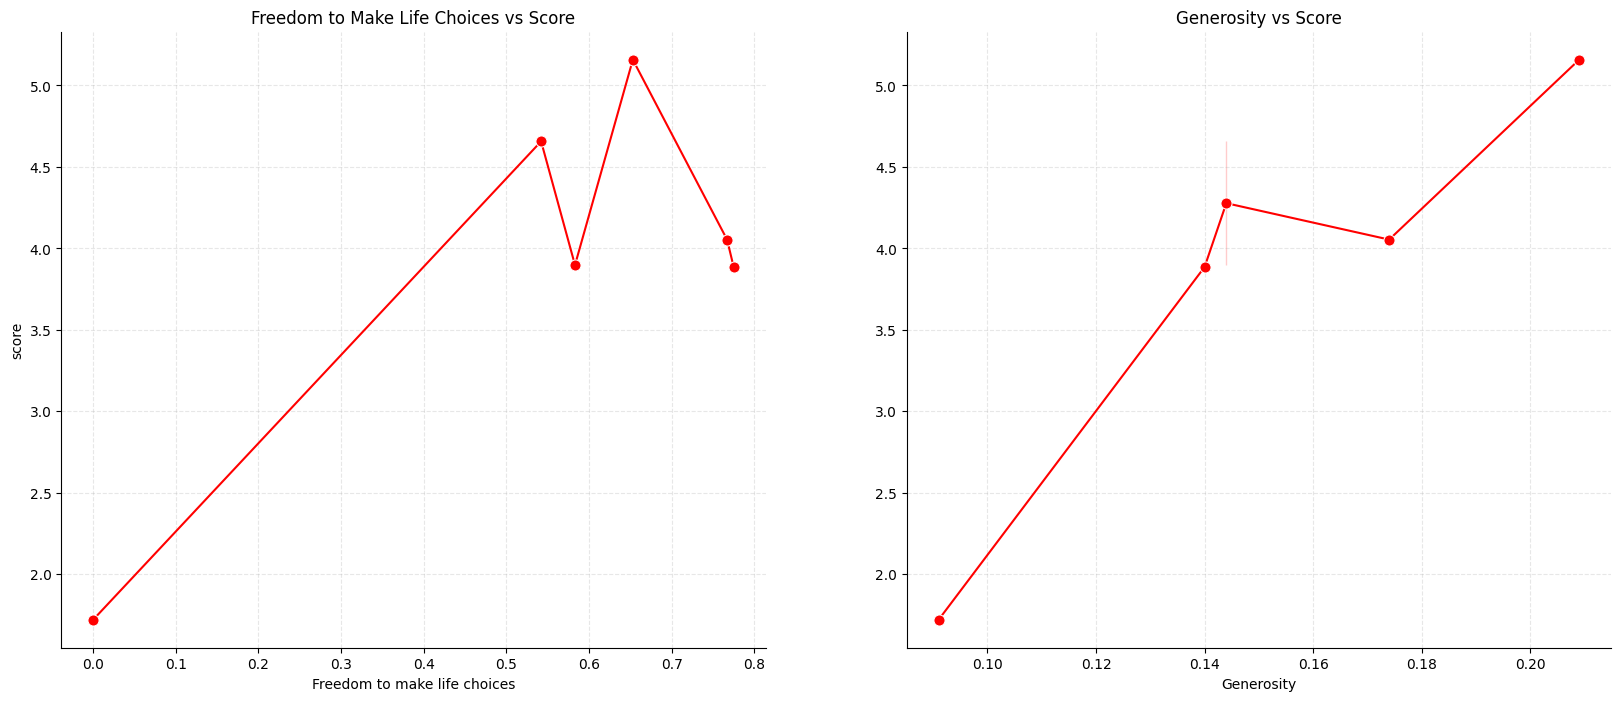

In [25]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(
    data=df_sac,
    x="Freedom to make life choices",
    y="score",
    marker="o",
    color="red",
    markersize=8,
    ax=ax1,
).set_title("Freedom to Make Life Choices vs Score")
ax1.grid(linestyle="--", alpha=0.3)

sns.lineplot(
    data=df_sac,
    x="Generosity",
    y="score",
    marker="o",
    color="red",
    markersize=8,
    ax=ax2,
).set_title("Generosity vs Score")
ax2.set_ylabel("")
ax2.grid(linestyle="--", alpha=0.3)

sns.despine()
plt.show()

##### 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.


The strongest relationship is between Generosity and Score, indicating a strong positive association.
The weakest relationship is between Freedom to Make Life Choices and Score, which is still positive but weaker than Generosity.
In South Asian countries, Generosity appears to have a more significant impact on happiness scores compared to Freedom to Make Life Choices, as seen in the higher correlation coefficient.


#### Task - 5 - Gap Analysis:


##### 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.


In [26]:
df_sac["GDP-Score Gap"] = df_sac["Log GDP per capita"] - df_sac["score"]
df_sac

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Outlier,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,False,-4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,False,-3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,False,-2.888
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739,False,-2.537
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,False,-2.764
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,True,-1.093


##### 2. Rank the South Asian countries by this gap in both ascending and descending order.


In [27]:
gap_asc = df_sac.nsmallest(len(df_sac), "GDP-Score Gap")
print(gap_asc[["Country name", "GDP-Score Gap"]])
print()
gap_dsc = df_sac.nlargest(len(df_sac), "GDP-Score Gap")
print(gap_dsc[["Country name", "GDP-Score Gap"]])

  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
4   Bangladesh         -2.764
3    Sri Lanka         -2.537
5  Afghanistan         -1.093

  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193


##### 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.


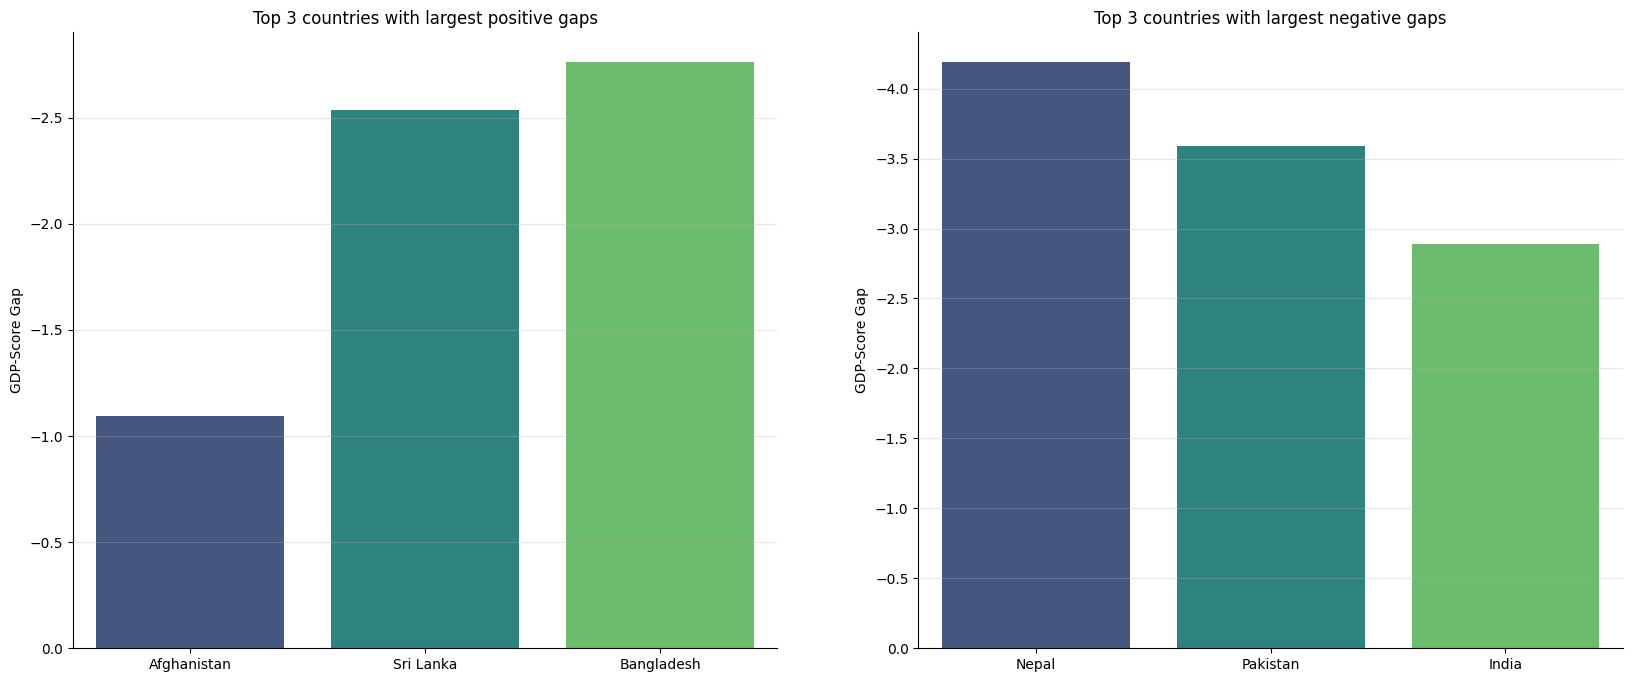

In [28]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(
    data=gap_dsc.head(3),
    x="Country name",
    y="GDP-Score Gap",
    hue="Country name",
    palette="viridis",
    ax=ax1,
).set_title("Top 3 countries with largest positive gaps")
ax1.set_xlabel("")
ax1.grid(axis="y", alpha=0.3)
ax1.invert_yaxis()

sns.barplot(
    data=gap_asc.head(3),
    x="Country name",
    y="GDP-Score Gap",
    hue="Country name",
    palette="viridis",
    ax=ax2,
).set_title("Top 3 countries with largest negative gaps")
ax2.set_xlabel("")
ax2.grid(axis="y", alpha=0.3)
ax2.invert_yaxis()

sns.despine()
plt.show()

##### 4. Analyze the reasons behind these gaps and their implications for South Asian countries.


These gaps suggest that economic growth alone doesn't guarantee happiness. South Asian countries should focus on holistic development, including social support, health, and freedom, to bridge these gaps and improve overall well-being. Outliers like Afghanistan can skew regional averages, affecting policy comparisons.


### Problem - 3 - Comparative Analysis:


#### Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

#### 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:

    middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


In [29]:
middle_east_countries = [
    "Bahrain",
    "Iran",
    "Iraq",
    "Israel",
    "Jordan",
    "Kuwait",
    "Lebanon",
    "Oman",
    "State of Palestine",
    "Qatar",
    "Saudi Arabia",
    "Syria",
    "United Arab Emirates",
    "Yemen",
]

df_mec = df[df["Country name"].isin(middle_east_countries)]
df_mec

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
102,State of Palestine,4.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760


##### 1. Descriptive Statistics:


- Calculate the mean, Standard deviation of the score for both South Asia and Middle East.


In [30]:
mean_sac = df_sac.score.mean()
std_sac = df_sac.score.std()
mean_mec = df_mec.score.mean()
std_mec = df_mec.score.std()

print("South Asian Countries (Score):")
print(f"Mean: {mean_sac}")
print(f"Standard Deviation: {std_sac}")
print()
print("Middle East Countries (Score):")
print(f"Mean: {mean_mec}")
print(f"Standard Deviation: {std_mec}")

South Asian Countries (Score):
Mean: 3.895666666666667
Standard Deviation: 1.1770690152521504

Middle East Countries (Score):
Mean: 5.363636363636363
Standard Deviation: 1.4944977265106343


- Which region has higher happiness Scores on average?


Middle East Countries have higher hapiness score on average.


##### 2. Top and Bottom Performers:


- Identify the top 3 and bottom 3 countries in each region based on the score.


In [31]:
top_3_sac = (
    df_sac[["Country name", "score"]].nlargest(3, "score")
)
bottom_3_sac = df_sac[["Country name", "score"]].nsmallest(3, "score")

top_3_mec = (
    df_mec[["Country name", "score"]].nlargest(3, "score")
)
bottom_3_mec = df_mec[["Country name", "score"]].nsmallest(3, "score")

print("Top 3 South Asian Countries:")
print(top_3_sac)
print()
print("Bottom 3 South Asian Countries:")
print(bottom_3_sac)
print()
print("Top 3 Middle East Countries:")
print(top_3_mec)
print()
print("Bottom 3 Middle East Countries:")
print(bottom_3_mec)

Top 3 South Asian Countries:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

Bottom 3 South Asian Countries:
  Country name  score
5  Afghanistan  1.721
4   Bangladesh  3.886
3    Sri Lanka  3.898

Top 3 Middle East Countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle East Countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


- Plot bar charts comparing these charts.


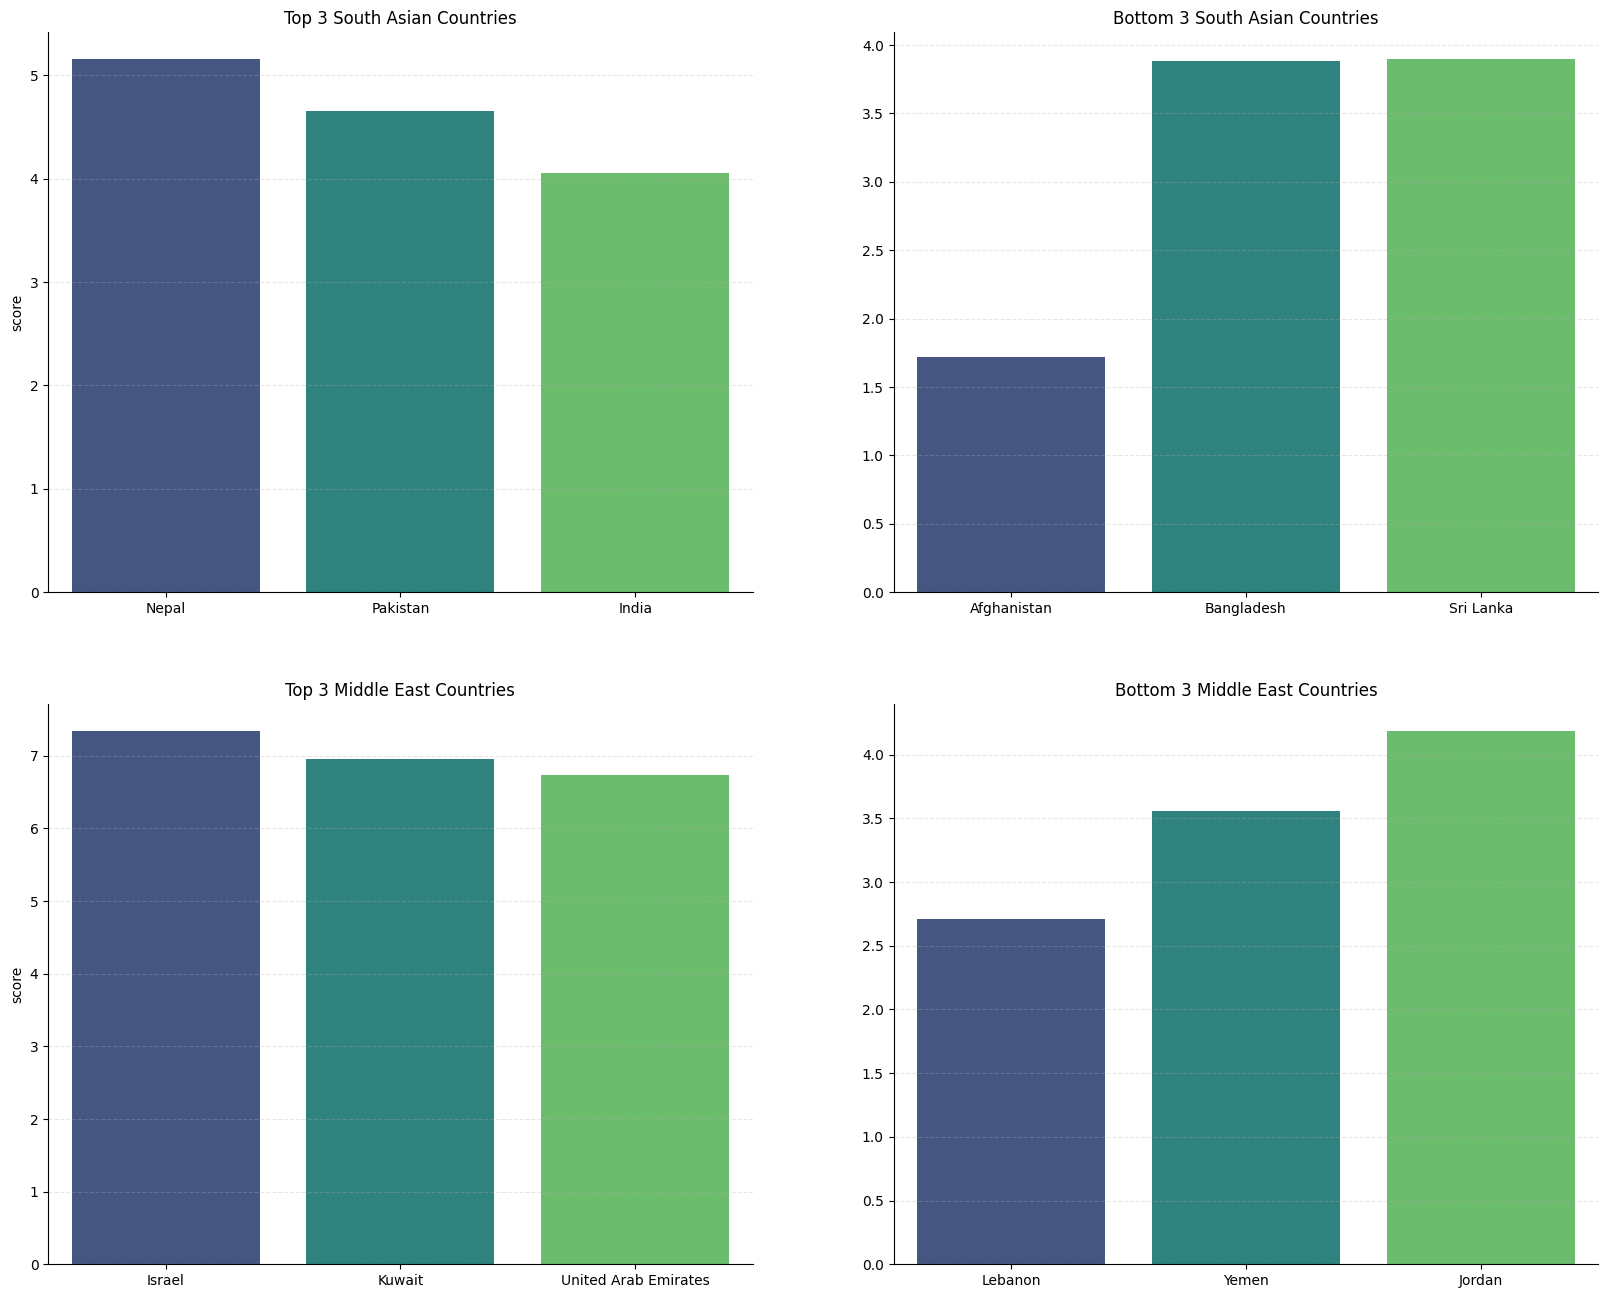

In [32]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

sns.barplot(
    data=top_3_sac,
    x="Country name",
    y="score",
    hue="Country name",
    palette="viridis",
    ax=ax1,
).set_title("Top 3 South Asian Countries")
ax1.set_xlabel("")
ax1.grid(axis="y", linestyle="--", alpha=0.3)

sns.barplot(
    data=bottom_3_sac,
    x="Country name",
    y="score",
    hue="Country name",
    palette="viridis",
    ax=ax2,
).set_title("Bottom 3 South Asian Countries")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.grid(axis="y", linestyle="--", alpha=0.3)

sns.barplot(
    data=top_3_mec,
    x="Country name",
    y="score",
    hue="Country name",
    palette="viridis",
    ax=ax3,
).set_title("Top 3 Middle East Countries")
ax3.set_xlabel("")
ax3.grid(axis="y", linestyle="--", alpha=0.3)

sns.barplot(
    data=bottom_3_mec,
    x="Country name",
    y="score",
    hue="Country name",
    palette="viridis",
    ax=ax4,
).set_title("Bottom 3 Middle East Countries")
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.grid(axis="y", linestyle="--", alpha=0.3)

sns.despine()
plt.show()

##### 3. Metric Comparisons:


- Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.


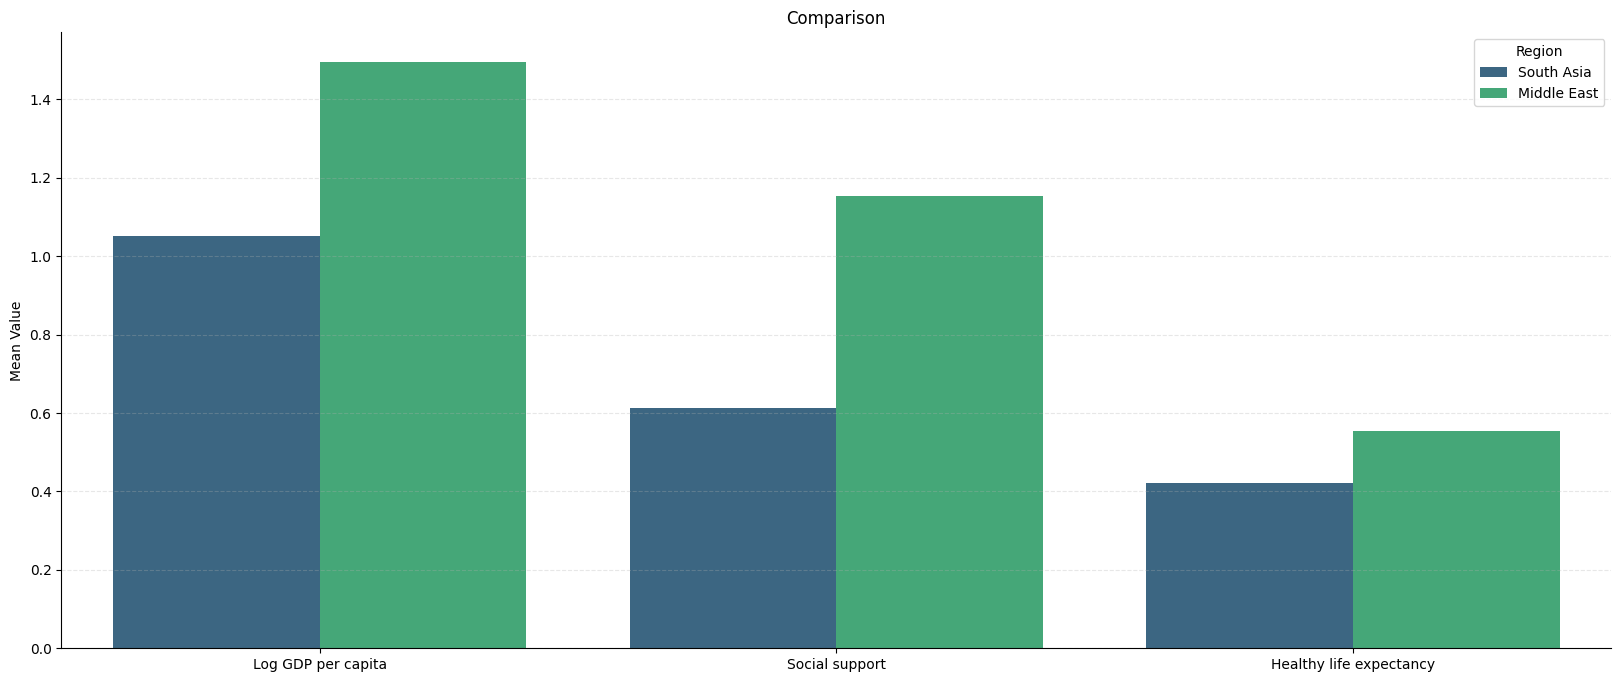

In [33]:
sac_means = df_sac[
    ["Log GDP per capita", "Social support", "Healthy life expectancy"]
].mean()
mec_means = df_mec[
    ["Log GDP per capita", "Social support", "Healthy life expectancy"]
].mean()

comparison_df = pd.DataFrame(
    {
        "Metric": ["Log GDP per capita", "Social support", "Healthy life expectancy"],
        "South Asia": sac_means.values,
        "Middle East": mec_means.values,
    }
)

comparison_melted = comparison_df.melt(
    id_vars="Metric", var_name="Region", value_name="Mean Value"
)

plt.figure(figsize=(20, 8))
sns.barplot(
    data=comparison_melted, x="Metric", y="Mean Value", hue="Region", palette="viridis"
).set_title("Comparison")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.show()

- Which metrics show the largest disparity between the two regions?


Social support shows the largest disparity between the two regions, with Middle East having a mean of around 1.15 compared to South Asia's 0.5 (difference of approximately 0.65). GDP per capita follows with a difference of about 0.5, while Healthy life expectancy has the smallest gap at around 0.15. This indicates Middle East countries generally have stronger social networks, which may contribute to higher happiness scores.


##### 4. Happiness Disparity:


- Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.


In [34]:
print("South Asian Countries:")
print(f"Range (Max - Min): {df_sac['score'].max() - df_sac['score'].min()}")
print(
    f"Coefficient of Variation (CV): {df_sac['score'].std() / df_sac['score'].mean()}"
)
print()
print("Middle East Countries:")
print(f"Range (Max - Min): {df_mec['score'].max() - df_mec['score'].min()}")
print(
    f"Coefficient of Variation (CV): {df_mec['score'].std() / df_mec['score'].mean()}"
)

South Asian Countries:
Range (Max - Min): 3.4370000000000003
Coefficient of Variation (CV): 0.3021482883337427

Middle East Countries:
Range (Max - Min): 4.634
Coefficient of Variation (CV): 0.2786351693494403


- Which region has greater variability in happiness?


South Asia has greater variability in happiness, with a higher coefficient of variation compared to the Middle East, indicating more relative dispersion in scores. This is driven by outliers like Afghanistan pulling down the regional average.


##### 5. Correlation Analysis:


- Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.


In [35]:
sac_free_corr = df_sac["Freedom to make life choices"].corr(df_sac["score"])
sac_gen_corr = df_sac["Generosity"].corr(df_sac["score"])

mec_free_corr = df_mec["Freedom to make life choices"].corr(df_mec["score"])
mec_gen_corr = df_mec["Generosity"].corr(df_mec["score"])

print("South Asian Countries:")
print(f"Freedom to Make Life Choices: {sac_free_corr}")
print(f"Generosity: {sac_gen_corr}")
print()
print("Middle East Coutries:")
print(f"Freedom to Make Life Choices: {mec_free_corr}")
print(f"Generosity: {mec_gen_corr}")

South Asian Countries:
Freedom to Make Life Choices: 0.8005185224163315
Generosity: 0.874512371253192

Middle East Coutries:
Freedom to Make Life Choices: 0.8632202433827543
Generosity: 0.6275236536964182


- Create scatter plots to visualize and interpret the relationships.


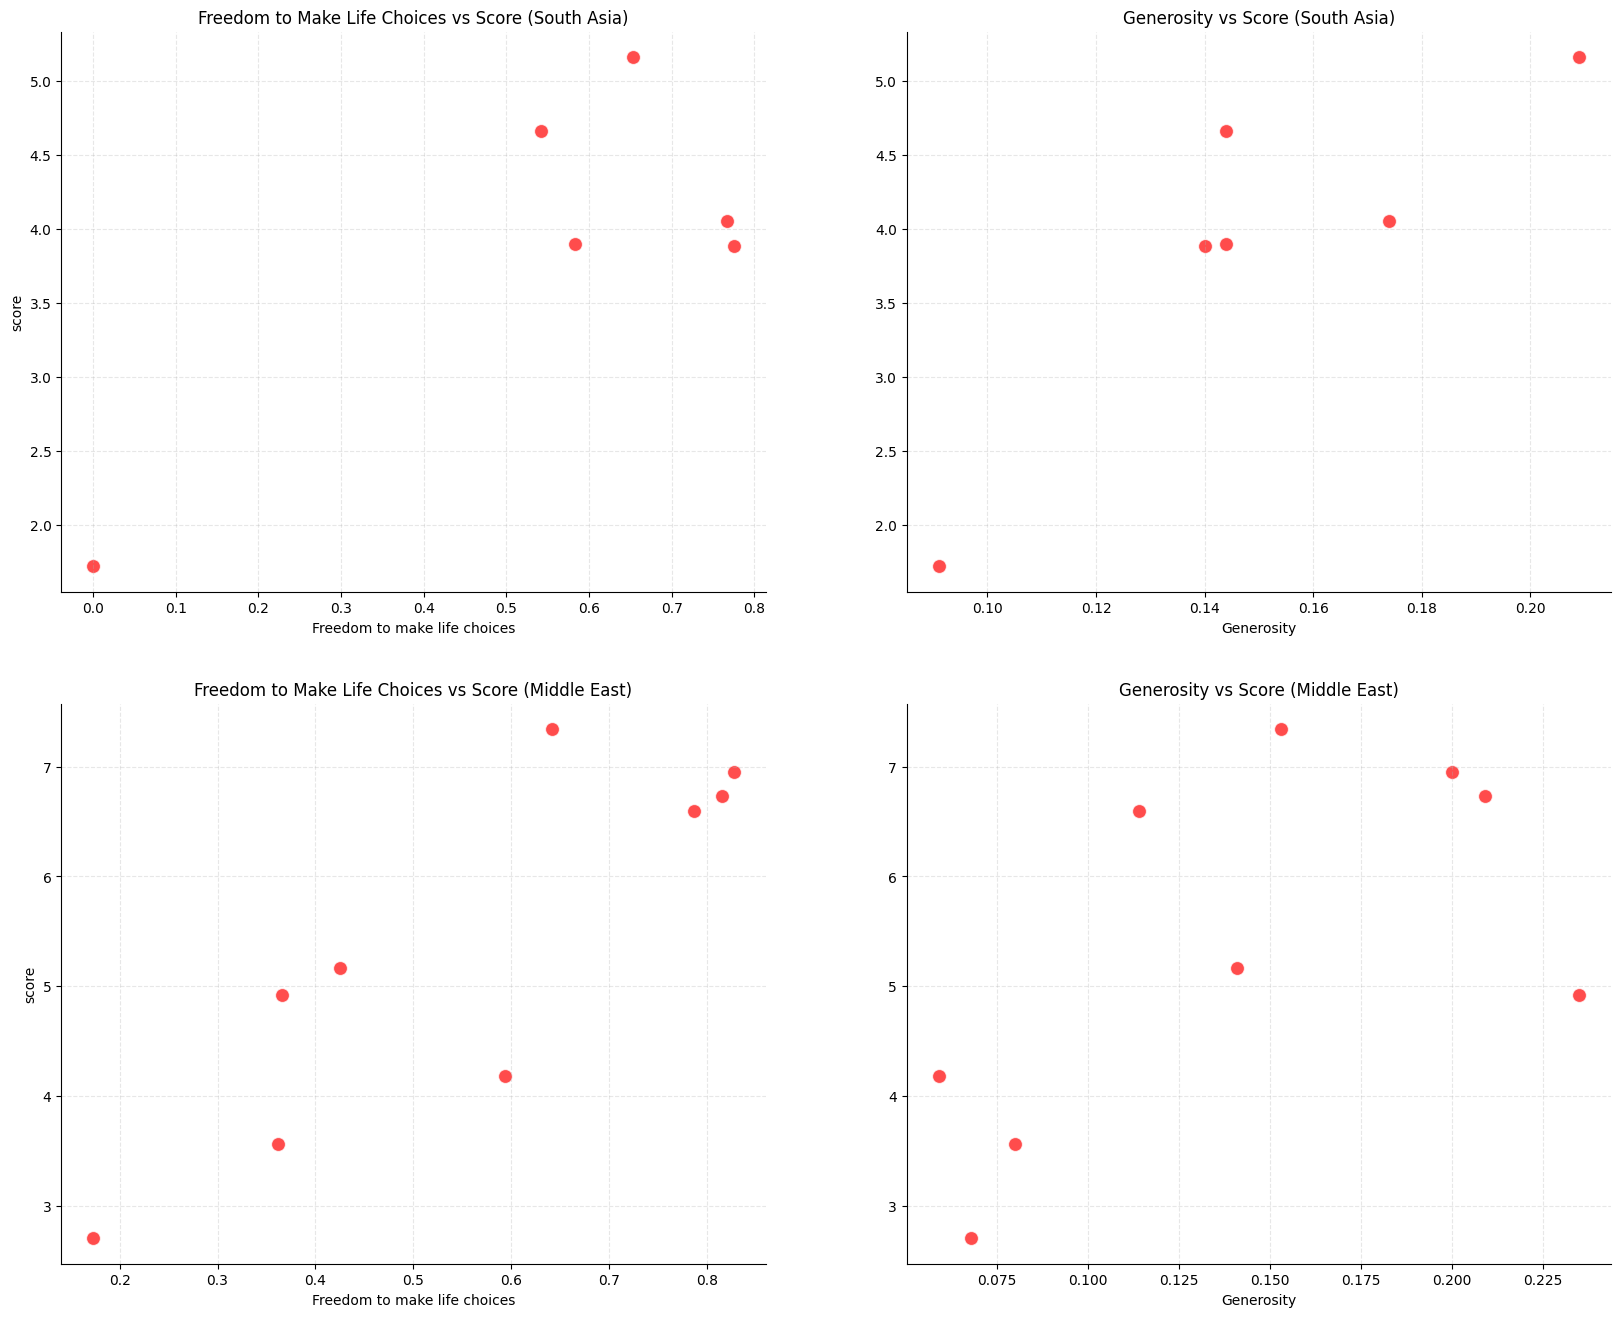

In [36]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

sns.scatterplot(
    data=df_sac,
    x="Freedom to make life choices",
    y="score",
    color="red",
    alpha=0.7,
    s=100,
    ax=ax1,
).set_title("Freedom to Make Life Choices vs Score (South Asia)")
ax1.grid(linestyle="--", alpha=0.3)

sns.scatterplot(
    data=df_sac, x="Generosity", y="score", color="red", alpha=0.7, s=100, ax=ax2
).set_title("Generosity vs Score (South Asia)")
ax2.set_ylabel("")
ax2.grid(linestyle="--", alpha=0.3)

sns.scatterplot(
    data=df_mec,
    x="Freedom to make life choices",
    y="score",
    color="red",
    alpha=0.7,
    s=100,
    ax=ax3,
).set_title("Freedom to Make Life Choices vs Score (Middle East)")
ax3.grid(linestyle="--", alpha=0.3)


sns.scatterplot(
    data=df_mec, x="Generosity", y="score", color="red", alpha=0.7, s=100, ax=ax4
).set_title("Generosity vs Score (Middle East)")
ax4.set_ylabel("")
ax4.grid(linestyle="--", alpha=0.3)

sns.despine()
plt.show()

##### 6. Outlier Detection:


- Identify outlier countries in both regions based on Score and GDP per Capita.


In [37]:
outliers_sac_score = get_outliers(df_sac["score"])
outliers_sac_gdp = get_outliers(df_sac["Log GDP per capita"])

print("South Asia Outlier Countries by Score:")
print(df_sac.loc[outliers_sac_score.index, ["Country name", "score"]])
print()
print("South Asia Outlier Countries by GDP per Capita:")
print(df_sac.loc[outliers_sac_gdp.index, ["Country name", "Log GDP per capita"]])

outliers_mec_score = get_outliers(df_mec["score"])
outliers_mec_gdp = get_outliers(df_mec["Log GDP per capita"])

print()

print("Middle East Outlier Countries by Score:")
print(df_mec.loc[outliers_mec_score.index, ["Country name", "score"]])
print()
print("Middle East Outlier Countries by GDP per Capita:")
print(df_mec.loc[outliers_mec_gdp.index, ["Country name", "Log GDP per capita"]])

South Asia Outlier Countries by Score:
  Country name  score
5  Afghanistan  1.721

South Asia Outlier Countries by GDP per Capita:
  Country name  Log GDP per capita
5  Afghanistan               0.628

Middle East Outlier Countries by Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East Outlier Countries by GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


- Plot these outliers and discuss their implications.


C:\Users\Qwerty\AppData\Local\Temp\ipykernel_7628\2624755305.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


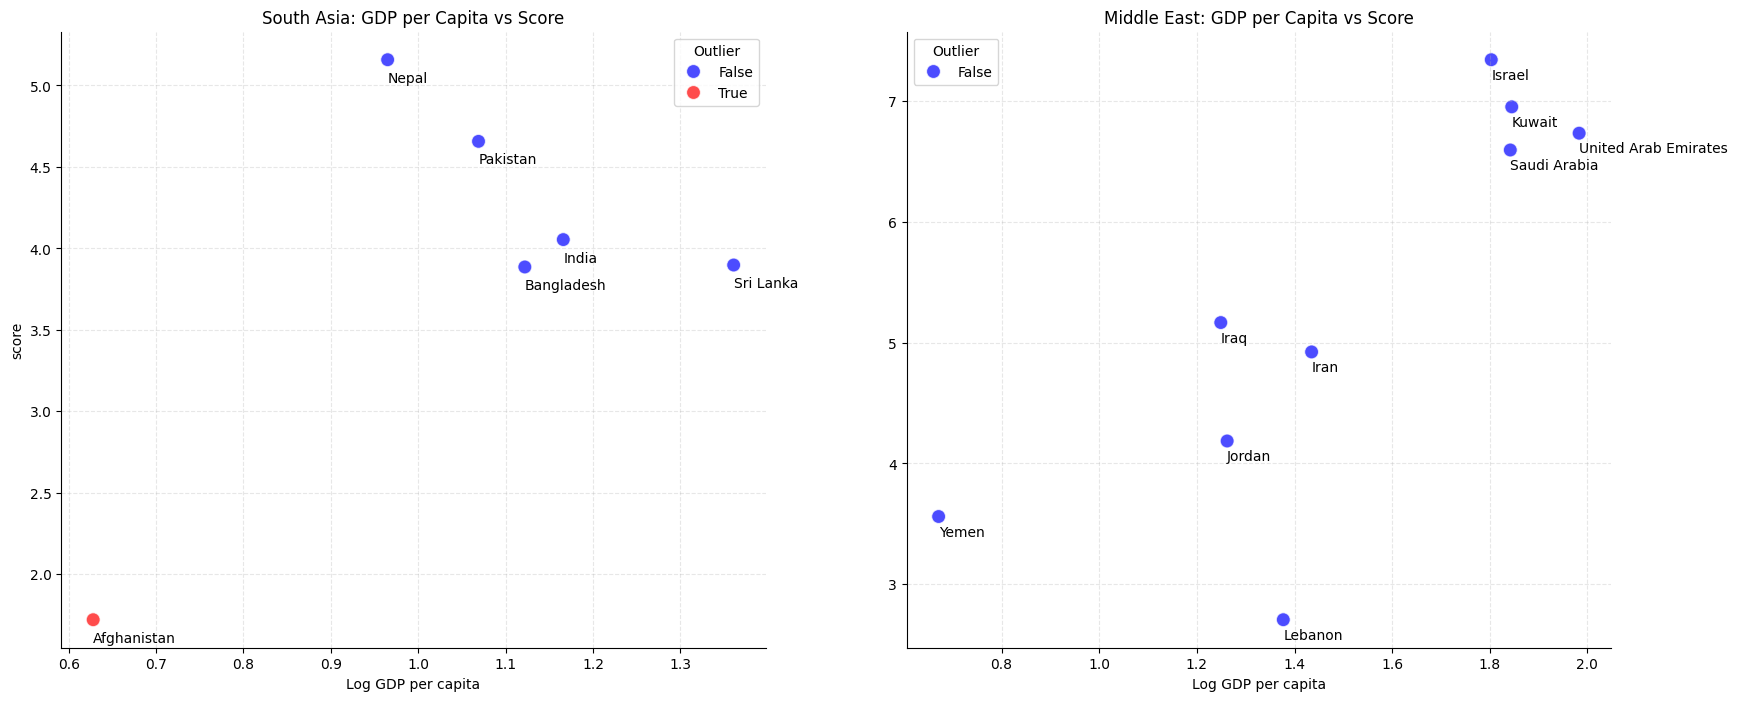

In [38]:
outlier_indices_sac = outliers_sac_score.index.union(outliers_sac_gdp.index)
df_sac_copy = df_sac.copy()
df_sac_copy["Outlier"] = df_sac_copy.index.isin(outlier_indices_sac)

outlier_indices_mec = outliers_mec_score.index.union(outliers_mec_gdp.index)
df_mec_copy = df_mec.copy()
df_mec_copy["Outlier"] = df_mec_copy.index.isin(outlier_indices_mec)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(
    data=df_sac_copy,
    x="Log GDP per capita",
    y="score",
    hue="Outlier",
    palette=["blue", "red"],
    alpha=0.7,
    s=100,
    ax=ax1,
).set_title("South Asia: GDP per Capita vs Score")
ax1.grid(linestyle="--", alpha=0.3)

sns.scatterplot(
    data=df_mec_copy,
    x="Log GDP per capita",
    y="score",
    hue="Outlier",
    palette=["blue", "red"],
    alpha=0.7,
    s=100,
    ax=ax2,
).set_title("Middle East: GDP per Capita vs Score")
ax2.set_ylabel("")
ax2.grid(linestyle="--", alpha=0.3)


for i in range(len(df_sac_copy)):
    ax1.text(
        df_sac_copy.iloc[i]["Log GDP per capita"],
        df_sac_copy.iloc[i]["score"] - 0.07,
        df_sac_copy.iloc[i]["Country name"],
        va="top"
    )

for i in range(len(df_mec_copy)):
    ax2.text(
        df_mec_copy.iloc[i]["Log GDP per capita"],
        df_mec_copy.iloc[i]["score"] - 0.07,
        df_mec_copy.iloc[i]["Country name"],
        va="top"
    )

sns.despine()
plt.show()

# Outliers like Afghanistan in South Asia indicate extreme socio-economic challenges, lowering regional averages and affecting policy analyses. Removing them could provide a clearer view of typical performance, but including them highlights disparities needing targeted interventions.

##### 7. Visualization:


- Create boxplots comparing the distribution of Score between South Asia and the Middle East.


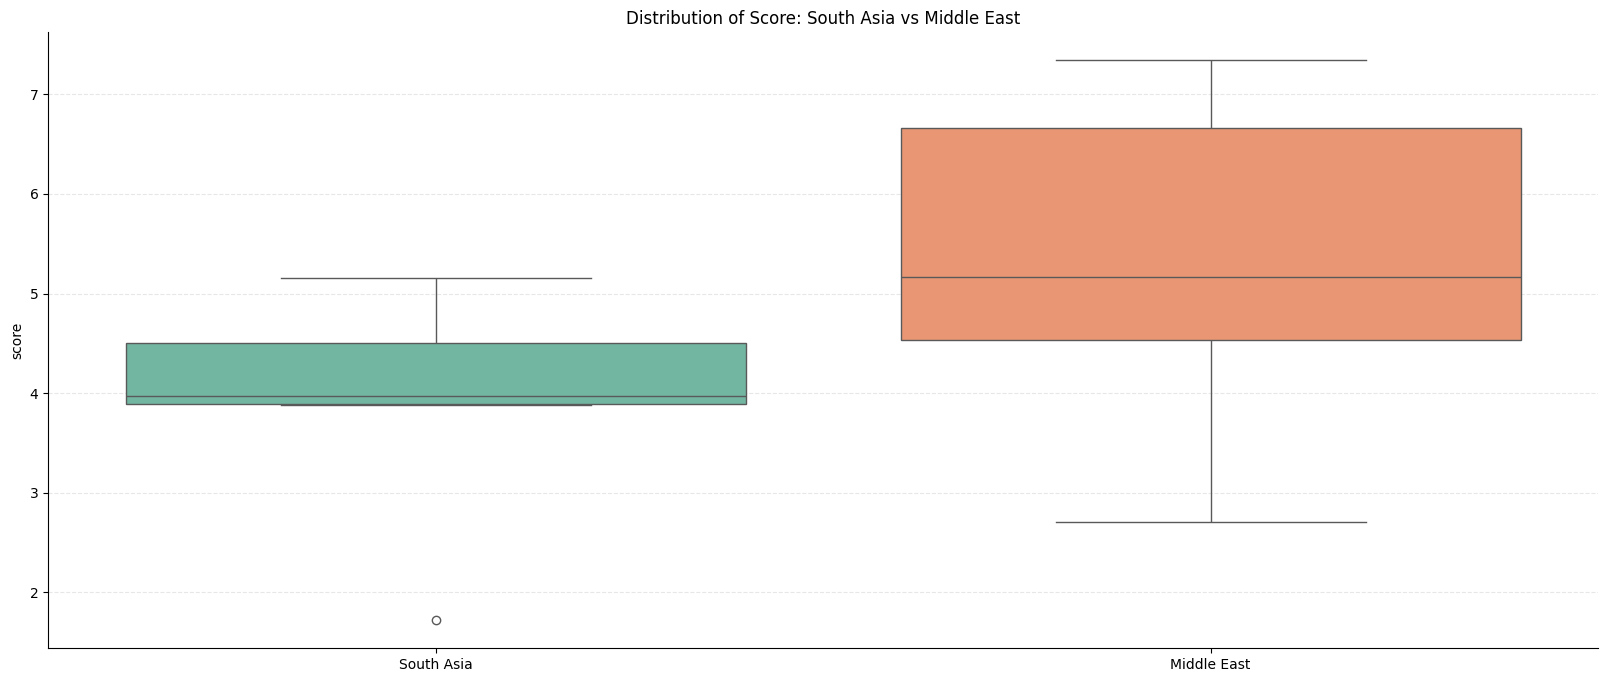

In [39]:
df_sac_copy = df_sac.copy()
df_mec_copy = df_mec.copy()
df_sac_copy["Region"] = "South Asia"
df_mec_copy["Region"] = "Middle East"
combined_df = pd.concat([df_sac_copy, df_mec_copy])

plt.figure(figsize=(20, 8))
sns.boxplot(
    data=combined_df, x="Region", y="score", hue="Region", palette="Set2"
).set_title("Distribution of Score: South Asia vs Middle East")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.show()

- Interpret the key differences in distribution shapes, medians, and outliers.


The boxplot reveals that the Middle East has a higher median score compared to South Asia, indicating generally higher happiness levels in the Middle East. South Asia shows greater variability with a wider interquartile range (IQR) and a lower outlier (Afghanistan), reflecting more dispersion in scores. The Middle East has a more compact distribution. Both regions have skewed distributions towards lower scores, but the Middle East's distribution is shifted upwards, suggesting better overall performance, while outlier in South Asia highlight significant disparities within region.
